In [1]:
import formulas

In [2]:
func = formulas.Parser().ast('=(1 + 1) + B3 / A2')[1].compile()

In [3]:
list(func.inputs)

['A2', 'B3']

In [4]:
fpath, dir_output = 'Formula Test.xlsx', 'output'
xl_model = formulas.ExcelModel().loads(fpath).finish()
xl_model.calculate()

0it [00:00, ?it/s]


Solution({"'[Formula Test.xlsx]SHEET1'!B2": <Ranges>('[Formula Test.xlsx]SHEET1'!B2)=[['purchase_price']], "'[Formula Test.xlsx]SHEET1'!B3": <Ranges>('[Formula Test.xlsx]SHEET1'!B3)=[[350000]], "'[Formula Test.xlsx]SHEET1'!C2": <Ranges>('[Formula Test.xlsx]SHEET1'!C2)=[['tei_multiplier']], "'[Formula Test.xlsx]SHEET1'!C3": <Ranges>('[Formula Test.xlsx]SHEET1'!C3)=[[0.25]], "'[Formula Test.xlsx]SHEET1'!D2": <Ranges>('[Formula Test.xlsx]SHEET1'!D2)=[['tax_rate']], "'[Formula Test.xlsx]SHEET1'!D3": <Ranges>('[Formula Test.xlsx]SHEET1'!D3)=[[0.002]], "'[Formula Test.xlsx]SHEET1'!E2": <Ranges>('[Formula Test.xlsx]SHEET1'!E2)=[['Renovations']], "'[Formula Test.xlsx]SHEET1'!E3": <Ranges>('[Formula Test.xlsx]SHEET1'!E3)=[[15000]], "'[Formula Test.xlsx]SHEET1'!F2": <Ranges>('[Formula Test.xlsx]SHEET1'!F2)=[['property_taxes']], "'[Formula Test.xlsx]SHEET1'!G2": <Ranges>('[Formula Test.xlsx]SHEET1'!G2)=[['closing_clsts_multiplier']], "'[Formula Test.xlsx]SHEET1'!G3": <Ranges>('[Formula Test.xlsx]

In [5]:
import json
xl_dict = xl_model.to_dict()
xl_dict

{"'[Formula Test.xlsx]SHEET1'!B2": 'purchase_price',
 "'[Formula Test.xlsx]SHEET1'!C2": 'tei_multiplier',
 "'[Formula Test.xlsx]SHEET1'!D2": 'tax_rate',
 "'[Formula Test.xlsx]SHEET1'!E2": 'Renovations',
 "'[Formula Test.xlsx]SHEET1'!F2": 'property_taxes',
 "'[Formula Test.xlsx]SHEET1'!G2": 'closing_clsts_multiplier',
 "'[Formula Test.xlsx]SHEET1'!H2": 'closing_costs',
 "'[Formula Test.xlsx]SHEET1'!I2": 'total_equity_investment',
 "'[Formula Test.xlsx]SHEET1'!J2": 'loan_amount',
 "'[Formula Test.xlsx]SHEET1'!B3": 350000,
 "'[Formula Test.xlsx]SHEET1'!C3": 0.25,
 "'[Formula Test.xlsx]SHEET1'!D3": 0.002,
 "'[Formula Test.xlsx]SHEET1'!E3": 15000,
 "'[Formula Test.xlsx]SHEET1'!G3": 0.1,
 "'[Formula Test.xlsx]SHEET1'!F3": "=('[Formula Test.xlsx]SHEET1'!D3 * '[Formula Test.xlsx]SHEET1'!B3)",
 "'[Formula Test.xlsx]SHEET1'!H3": "=('[Formula Test.xlsx]SHEET1'!B3 * '[Formula Test.xlsx]SHEET1'!G3)",
 "'[Formula Test.xlsx]SHEET1'!I3": "=('[Formula Test.xlsx]SHEET1'!C3 * SUM('[Formula Test.xlsx]SHEE

In [6]:
import formulas

# 1. Load the Excel workbook into an ExcelModel
xl_model = formulas.ExcelModel().loads(fpath).finish()

# 2. Get the JSON-style dict (you already showed an example of this)
xl_dict = xl_model.to_dict()

# 3. Create a parser for formula strings
parser = formulas.Parser()


0it [00:00, ?it/s]


In [7]:
f3_formula = xl_dict["'[Formula Test.xlsx]SHEET1'!F3"]
func = parser.ast(f3_formula)[1].compile()

In [9]:
func.dsp

In [ ]:
dsp = xl_model.dsp
list(dsp.nodes)
list(dsp.)

["'[Formula Test.xlsx]SHEET1'!B2",
 "'[Formula Test.xlsx]SHEET1'!C2",
 "'[Formula Test.xlsx]SHEET1'!D2",
 "'[Formula Test.xlsx]SHEET1'!E2",
 "'[Formula Test.xlsx]SHEET1'!F2",
 "'[Formula Test.xlsx]SHEET1'!G2",
 "'[Formula Test.xlsx]SHEET1'!H2",
 "'[Formula Test.xlsx]SHEET1'!I2",
 "'[Formula Test.xlsx]SHEET1'!J2",
 "'[Formula Test.xlsx]SHEET1'!B3",
 "'[Formula Test.xlsx]SHEET1'!C3",
 "'[Formula Test.xlsx]SHEET1'!D3",
 "'[Formula Test.xlsx]SHEET1'!E3",
 "'[Formula Test.xlsx]SHEET1'!F3",
 "=('[Formula Test.xlsx]SHEET1'!D3 * '[Formula Test.xlsx]SHEET1'!B3)",
 "'[Formula Test.xlsx]SHEET1'!G3",
 "'[Formula Test.xlsx]SHEET1'!H3",
 "=('[Formula Test.xlsx]SHEET1'!B3 * '[Formula Test.xlsx]SHEET1'!G3)",
 "'[Formula Test.xlsx]SHEET1'!I3",
 "=('[Formula Test.xlsx]SHEET1'!C3 * SUM('[Formula Test.xlsx]SHEET1'!B3, '[Formula Test.xlsx]SHEET1'!H3, '[Formula Test.xlsx]SHEET1'!E3))",
 "'[Formula Test.xlsx]SHEET1'!J3",
 "=((('[Formula Test.xlsx]SHEET1'!I3 + '[Formula Test.xlsx]SHEET1'!B3) + '[Formula Test.

In [15]:
import networkx as nx

xl = formulas.ExcelModel().loads(fpath).finish()

xl_dict = xl.to_dict()

parser = formulas.Parser()


G = nx.DiGraph()

for cell_addr, raw_value in xl_dict.items():

    G.add_node(cell_addr)

    if isinstance(raw_value, str) and raw_value.startswith("="):

        func = parser.ast(raw_value)[1].compile()

        for upstream in func.inputs:
            G.add_edge(upstream, cell_addr)

0it [00:00, ?it/s]


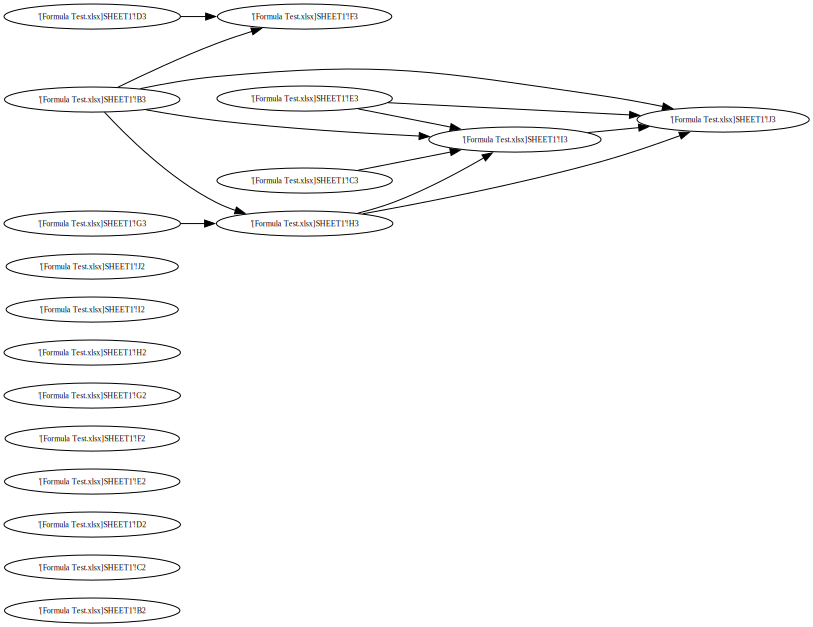

In [19]:
from visualization import visualize_graph_dot

visualize_graph_dot(G, fontsize=8, orienation="LR")

In [8]:
func.plot()
# list(func.inputs)

Site(SiteMap({=('[Formula Test.xlsx]SHEET1'!D3 * '[Formula Test.xlsx]SHEET1'!B3): SiteMap({})}), host='localhost', port=49533, depth=-1, executor='async', index=True, root_path=None, viz_js=False)

In [ ]:
fun

In [ ]:
for addr, value in xl_dict.items():
    if isinstance(value, str) and value.startswith("="):

        func = parser.ast(value)[1].compile()

        print(f"\nCell {addr}: {value}")

        print("Inputs:", list(func.inputs))


Cell '[Formula Test.xlsx]SHEET1'!F3: =('[Formula Test.xlsx]SHEET1'!D3 * '[Formula Test.xlsx]SHEET1'!B3)
Inputs: ["'[Formula Test.xlsx]SHEET1'!B3", "'[Formula Test.xlsx]SHEET1'!D3"]

Cell '[Formula Test.xlsx]SHEET1'!H3: =('[Formula Test.xlsx]SHEET1'!B3 * '[Formula Test.xlsx]SHEET1'!G3)
Inputs: ["'[Formula Test.xlsx]SHEET1'!B3", "'[Formula Test.xlsx]SHEET1'!G3"]

Cell '[Formula Test.xlsx]SHEET1'!I3: =('[Formula Test.xlsx]SHEET1'!C3 * SUM('[Formula Test.xlsx]SHEET1'!B3, '[Formula Test.xlsx]SHEET1'!H3, '[Formula Test.xlsx]SHEET1'!E3))
Inputs: ["'[Formula Test.xlsx]SHEET1'!B3", "'[Formula Test.xlsx]SHEET1'!C3", "'[Formula Test.xlsx]SHEET1'!E3", "'[Formula Test.xlsx]SHEET1'!H3"]

Cell '[Formula Test.xlsx]SHEET1'!J3: =((('[Formula Test.xlsx]SHEET1'!I3 + '[Formula Test.xlsx]SHEET1'!B3) + '[Formula Test.xlsx]SHEET1'!H3) + '[Formula Test.xlsx]SHEET1'!E3)
Inputs: ["'[Formula Test.xlsx]SHEET1'!B3", "'[Formula Test.xlsx]SHEET1'!E3", "'[Formula Test.xlsx]SHEET1'!H3", "'[Formula Test.xlsx]SHEET1'!I3

In [15]:

# 3. Iterate sheets and cells
for sheet_name, sheet in xl_model.items():   # xl_model[sheet_name] → sheet object
    print(f"\n=== Sheet: {sheet_name} ===")

    for addr, cell in sheet.cells.items():   # addr = "'[file.xlsx]Sheet'!B2"
        
        if not cell.formula:                 # skip literals
            continue
        
        formula_str = cell.formula           # e.g. "=(A2 + B3)"

        # Parse formula (remove '=')
        ast_builder, ast_func = parser.ast(formula_str[1:])

        print(f"\nCell {addr}: {formula_str}")
        print(ast_func)                      # compiled AST-like structure
        print(ast_func.tree)                 # show e_


AttributeError: 'ExcelModel' object has no attribute 'items'

In [7]:
xl_json = json.dumps(xl_dict, indent=True)
xl_model = formulas.ExcelModel().from_dict(json.loads(xl_json))

In [5]:
func2 = xl_model.compile()

TypeError: ExcelModel.compile() missing 2 required positional arguments: 'inputs' and 'outputs'

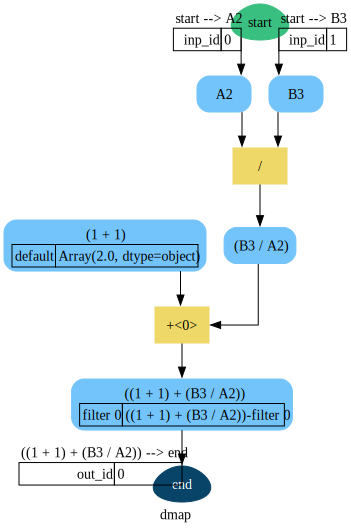

In [5]:
func.plot(view=False)

In [6]:
import formulas

fpath, dir_output = 'Formula Test.xlsx', 'output'

xl_model = formulas.ExcelModel().loads(fpath).finish()

xl_model.calculate()

0it [00:00, ?it/s]


Solution({"'[Formula Test.xlsx]SHEET1'!B2": <Ranges>('[Formula Test.xlsx]SHEET1'!B2)=[['My name']], "'[Formula Test.xlsx]SHEET1'!B3": <Ranges>('[Formula Test.xlsx]SHEET1'!B3)=[['Jon']], "'[Formula Test.xlsx]SHEET1'!C2": <Ranges>('[Formula Test.xlsx]SHEET1'!C2)=[['Your Name']], "'[Formula Test.xlsx]SHEET1'!C3": <Ranges>('[Formula Test.xlsx]SHEET1'!C3)=[['Molly']], "'[Formula Test.xlsx]SHEET1'!D2": <Ranges>('[Formula Test.xlsx]SHEET1'!D2)=[['Our Names']], "'[Formula Test.xlsx]SHEET1'!D3": <Ranges>('[Formula Test.xlsx]SHEET1'!D3)=[['JonMolly']]})

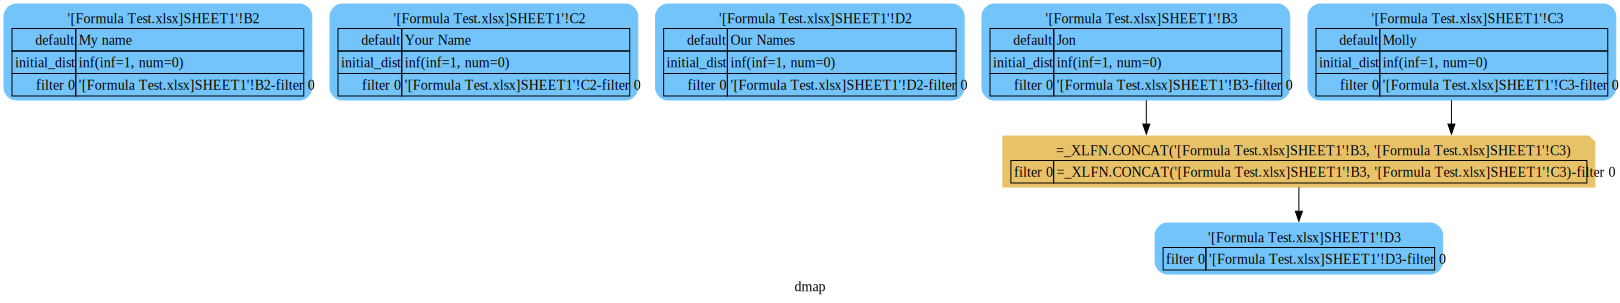

In [7]:
dsp = xl_model.dsp
dsp.plot(view=False)

In [ ]:
func = xl_model.compile(
    inputs=[
        "'[Formula Test.xlsx]SHEET1'!B3",
        "'[Formula Test.xlsx]SHEET1'!C3",
    ],
    outputs=[
        "'[Formula Test.xlsx]SHEET1'!D3",
    ]
) 
func

In [10]:
[v.value[0, 0] for v in func("Molly", "Jono")]

TypeError: 'Ranges' object is not iterable